<a href="https://colab.research.google.com/github/xander-bennett/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/Xander_Bennett_DS7_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [38]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_positive_drunk * prob_drunk_prior) / prob_positive
  
prob_drunk_given_positive(0.01, 0.08, 1)

0.125

In [39]:
def function(prob_positive_user, prob_user, prob_positive_non_user):
  return (prob_positive_user * prob_user) / ((prob_positive_user * prob_user) + (prob_positive_non_user * (1-prob_user)))
function(0.99, 0.005, 0.01)

0.33221476510067116

In [37]:
def function(prob_positive_user, prob_user, prob_positive_non_user):
  return (prob_positive_user * prob_user) / ((prob_positive_user * prob_user) + (prob_positive_non_user * (1-prob_user)))
function(0.99, 0.3322, 0.01)

# This isn't right because I'd have to update the function so that the probability of being a user is still .005. But the lecture notebook shows how you'd do it

0.980098701856024

In [29]:
(.99*.005)/((.99*.005) + (.01*.995))

0.33221476510067116

In [2]:
import scipy
from scipy import stats
help(scipy.stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

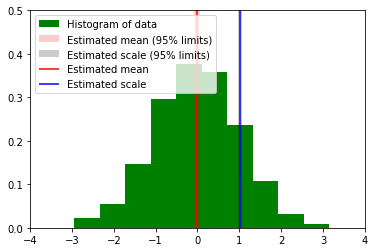

In [12]:
from scipy import stats
data = [1, 5, 29, 54, 17, 30, 100]
mean, var, std = stats.bayes_mvs(data)

n = 1000
data = stats.norm.rvs(size=n)
res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=10, density=True, label='Histogram of data', color='g')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
            alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='blue', label='Estimated scale')
ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='black', alpha=0.2,
            label=r'Estimated scale (95% limits)')
    
ax.legend(fontsize=10)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.show()

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)